# IBM Unsupervised Learning Capstone Project

*by Evangelos Tselentis - Straitouris*

## Introduction

The heart is an amazing organ. It continuously pumps oxygen and nutrient-rich blood throughout your body to sustain life. This fist-sized powerhouse beats (expands and contracts) 100,000 times per day pumping 23,000 liters (5,000 gallons) of blood every day. To work properly, the heart (just like any other muscle) needs a good blood supply.

A heart attack (also known as myocardial infarction; MI) is defined as the sudden blockage of blood flow to a portion of the heart. Some of the heart muscle begins to die during a heart attack, and without early medical treatment, the loss of the muscle could be permanent. 

Conditions such as high blood pressure, high blood cholesterol, obesity, and diabetes can raise the risk of a heart attack.  Behaviors such as an unhealthy diet, low levels of physical activity, smoking, and excessive alcohol consumption can contribute to the conditions that can cause heart attacks.  Some factors, such as age and family history of heart disease, cannot be modified but are associated with a higher risk of a heart attack. 

## Dataset

For the exploration of the risk a person has to develop a heart attack, the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) from *kaggle.com* was utilized. It consists of:

+ Age of the patient (age in years)
+ Sex of the patient (sex; 1 = male, 0 = female)
+ Exercise induced angina (exng; 1 = yes, 0 = no)
+ Number of major vessels (ca; 0-3)
+ Chest pain type (cp; Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
+ Resting blood pressure (trestpbs; in mm/Hg on admission to the hospital)
+ Cholesterol levels (chol; in mg/dl)
+ Fasting blood sugar (fbs; if > 120 mg/dl, 1 = true; 0 = false)
+ Resting electrocardiographic results (rest_ecg; 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
+ Maximum heart rate achieved (thalach)
+ Chance of heart attack (target: Heart disease)
+ A blood disorder called thalassemia (thall; 1 = normal; 2 = fixed defect; 3 = reversable defect)
+ Previous peak (oldpeak; ST depression induced by exercise relative to rest - ‘ST’ relates to positions on the ECG plot)
+ Slope (slp; the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping)


### Acknowledgements

*Creators*:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
    
### Aim

The aim of this project is to apply unsupervised learning techniques to find whether an individual will develop a heart attack risk or not. More specifically, after some feature engineering and exploratory data analysis, the k-means and agglomerative clusteing algorithms will be explored.

In [35]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set()

In [4]:
heart = pd.read_csv('heart.csv')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Feature Engineering

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
duplicate=heart[heart.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
heart_attack = heart.drop_duplicates()

In [10]:
categorical = ['sex', 'exang', 'ca', 'cp', 'thal', 'fbs', 'restecg', 'slope', 'target']

for cat in categorical:
    heart_attack[cat] = heart_attack[cat].astype('category')

In [11]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trestbps  302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalach   302 non-null    int64   
 8   exang     302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slope     302 non-null    category
 11  ca        302 non-null    category
 12  thal      302 non-null    category
 13  target    302 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 18.2 KB


In [12]:
heart_attack['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [13]:
heart_attack.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [14]:
heart_attack = heart_attack.reset_index(drop=True)

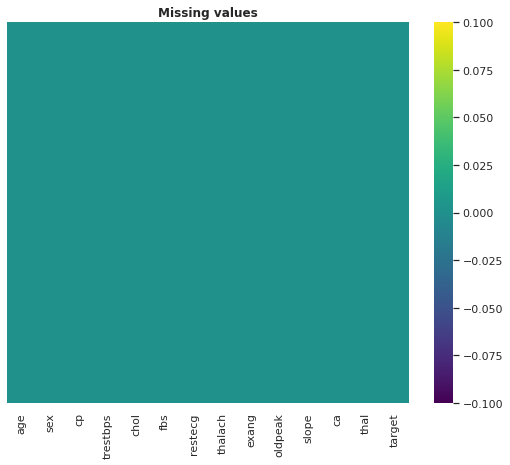

In [15]:
plt.figure(figsize=(9,7))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(heart.isnull(),yticklabels=False,cbar='viridis',cmap='viridis')

plt.show()

Numerical: Age, trestbps, chol, thalach, oldpeak

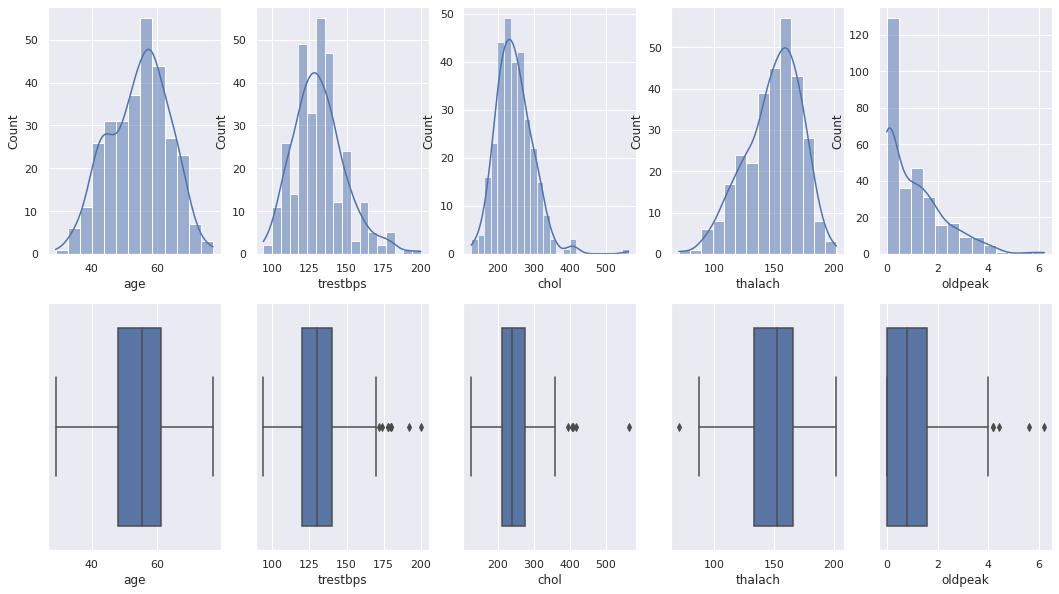

In [16]:
# Finding outliers and plotting histograms for all numerical features

plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(heart_attack['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.histplot(heart_attack['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(heart_attack['trestbps'])
plt.subplot(2,5,3)
sns.histplot(heart_attack['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,4)
sns.histplot(heart_attack['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(heart_attack['thalach'])
plt.subplot(2,5,5)
sns.histplot(heart_attack['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(heart_attack['oldpeak']);

### Removing the outliers

In [17]:
for col in ['trestbps', 'chol', 'oldpeak']:
    
    Q1 = heart_attack[col].quantile(0.25)
    Q3 = heart_attack[col].quantile(0.75)
    IQR = Q3 - Q1
    
    heart_attack.loc[heart_attack[col] > Q3 + 1.5 * IQR, col] = heart_attack.describe().loc['50%'][col]

In [18]:
Q1 = heart_attack['thalach'].quantile(0.25)
Q3 = heart_attack['thalach'].quantile(0.75)
IQR = Q3 - Q1
min_thalach = Q1 - 1.5 * IQR

median_thalach = heart_attack.describe().loc['50%']['thalach']
heart_attack.loc[heart_attack['thalach'] < min_thalach, 'thalach'] = median_thalach

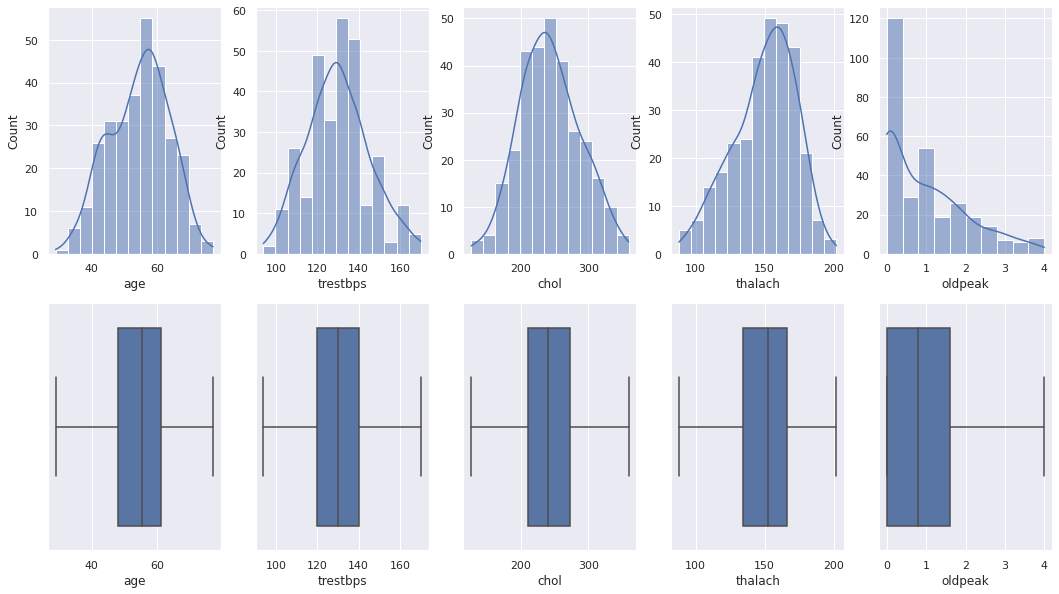

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(heart_attack['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(heart_attack['age'])
plt.subplot(2,5,2)
sns.histplot(heart_attack['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(heart_attack['trestbps'])
plt.subplot(2,5,3)
sns.histplot(heart_attack['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(heart_attack['chol'])
plt.subplot(2,5,4)
sns.histplot(heart_attack['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(heart_attack['thalach'])
plt.subplot(2,5,5)
sns.histplot(heart_attack['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(heart_attack['oldpeak']);

In [20]:
for col in heart_attack.columns:
    print(col,":",heart_attack[col].unique().size)

age : 41
sex : 2
cp : 4
trestbps : 43
chol : 148
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 36
slope : 3
ca : 5
thal : 4
target : 2


In [21]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [22]:
log_columns = heart_attack[numerical].skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

oldpeak    0.96995
dtype: float64

In [23]:
# The log transformations
for col in log_columns.index:
    heart_attack[col] = np.log1p(heart_attack[col])

In [24]:
sc = StandardScaler()
feature_columns = [x for x in heart_attack.columns if x not in categorical]
for col in feature_columns:
    heart_attack[col] = sc.fit_transform(heart_attack[[col]])

heart_attack.head(4)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.987461,-0.229564,1,0,0.007165,0,1.284737,0,0,1,1
1,-1.928548,1,2,-0.004379,0.152039,0,1,1.657982,0,1.905745,0,0,2,1
2,-1.485726,0,1,-0.004379,-0.880534,0,0,0.988732,0,0.647114,2,0,2,1
3,0.174856,1,1,-0.665606,-0.162222,0,1,1.256432,0,0.071103,2,0,2,1


### K-Means Clustering

The  scaled data was fitted to a k-means clustering model to determine the optimal number of clusters over a range of 1 to 13 clusters. The diagram below shows a plot of inertia versus clusters. 

In [25]:

km_list = list()

for clust in range(1,13):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(heart_attack.drop('target', axis=1))
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

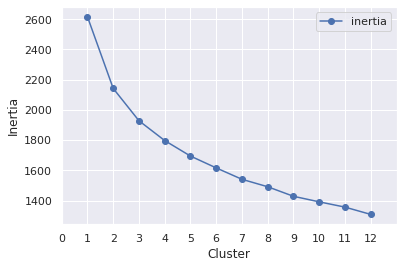

In [26]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,13))
ax.set_xlim(0,13)
ax.set(xlabel='Cluster', ylabel='Inertia');


The plot of inertia versus number of clusters shows an elbow at number of clusters equal to 2, that is k =2.

In [27]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(heart_attack.drop('target', axis=1))

heart_attack['kmeans'] = km.predict(heart_attack.drop('target', axis=1))
(heart_attack[['target','kmeans']]
 .groupby(['kmeans','target'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans target        
0      0           40
       1          142
1      0           98
       1           22

### Agglomerative Clustering

In [28]:
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(heart_attack.drop('target', axis=1))
    heart_attack[str('agglom_'+linkage)] = ag.fit_predict(heart_attack.drop('target', axis=1))

In [29]:
(heart_attack[['target','agglom_ward']]
 .groupby(['target','agglom_ward'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
target agglom_ward        
0      0                37
       1               101
1      0               131
       1                33

In [30]:
(heart_attack[['target','agglom_complete']]
     .groupby(['target','agglom_complete'])
     .size()
     .to_frame()
     .rename(columns={0:'number'}))

number
target agglom_complete        
0      0                    93
       1                    45
1      0                    18
       1                   146

In [31]:
# Comparison
(heart_attack[['target','agglom_complete', 'agglom_ward','kmeans']]
 .groupby(['target', 'agglom_complete', 'agglom_ward', 'kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
target agglom_complete agglom_ward kmeans        
0      0               0           0            2
                                   1            0
                       1           0            3
                                   1           88
       1               0           0           33
                                   1            2
                       1           0            2
                                   1            8
1      0               0           0            0
                                   1            0
                       1           0            2
                                   1           16
       1               0           0          131
                                   1            0
                       1           0            9
                                   1            6

The diagram below shows the dendrogram for the Hierarchical Agglomerative Clustering model.

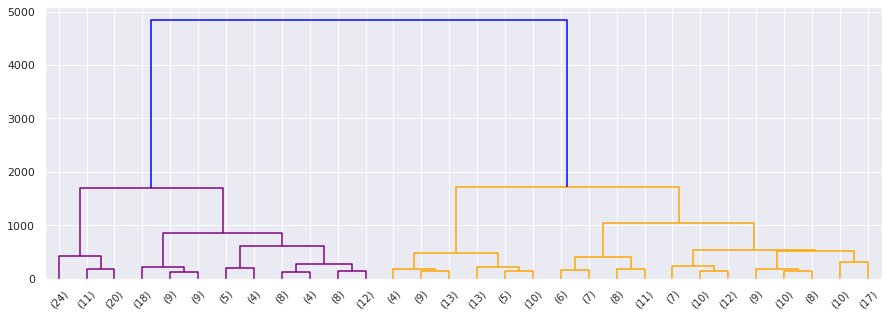

In [32]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

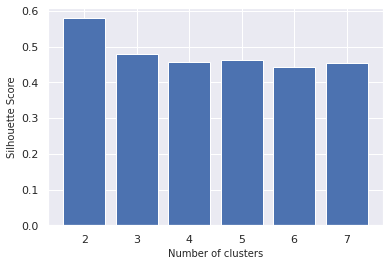

In [37]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(ag.children_, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(ag.children_))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Conclusion

### Findings
From the abovementioned analysis, a few important findings can be outlined. Performing both K-means and agglomerative clustering algorithms, one could observe that the best model for the prediction of a potential myocardial infarction is the **Complete-link agglomerative technique**. On the contrary, for predicting those cases that there won't be any implications, the most suitable is the **Ward-link agglomerative clustering**. From both the dendrogram and the silhoute score plots, it is evident that the optimal number of the clusters is **two**.

### Next steps
As a further suggestion, a DBSCAN could be implemented, following a Principal Component Analysis.